# StudentGradePrediction

In this notebook we will explore the supervised classification machine learning algorithmn

The goal is to clearly understand how classification work and to explore furthur into that catagory.

## Intro

First of all i would like this to be beginner friendly and easy to follow along and hope to increase my knowledge in this field, I will start Simple by making a dataframe of my own then explaining logc and then using a realdataset.
<br>
Predicting the student score always varied on different data such as anxiety,acedemic performnace,geographical location and their score in last few years or few months. But in our custom dataframe aimed to explain the logic we will only use small percenta

In [3]:
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie','Josh'],
    'Score': [75, 20, 45,90],
    'Grade': ['A', 'D', 'C','A']
}
df = pd.DataFrame(data)

In [4]:
df

,Name,Score,Grade
0,Alice,75,A
1,Bob,20,D
2,Charlie,45,C
3,Josh,90,A


## Importance and Unimportance Columns and Supervised Learning

We should determine which columns and drop and which to not drop in training our models, thus in our case we wont be needing Name, etc.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    4 non-null      object
 1   Score   4 non-null      int64 
 2   Grade   4 non-null      object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


## Question: What sort of algorithm should we use?

Well this question depend what result we are trying to get? are we trying to predict the student score based on the data or are we trying to classify students into Classes such as (A-grade,B-grade,etc). The thing for this is we can just base student according to their score, for example student below 40 are D and student above 70 are A in between can be C or B.
The problem with this is that the Grade are only assigned base on their score only and not accounting the other importance factor. I will try to use both Regression and Classification in this notebook to furthur enchance the knowledge of the reader and furthur enchancing my knwledge on MAchine learning and AI.

### Type of Classification
The primary types of classification in machine learning are Binary Classification (two outcomes), Multi-Class Classification (more than two distinct outcomes), and Multi-Label Classification (multiple outcomes for a single input).

In [6]:
import pandas as pd
import random

# Possible values for synthetic features
names = [f"Student_{i}" for i in range(1, 51)]
regions = ["Urban", "Rural", "Suburban"]
parental_education = ["None", "High School", "College", "Graduate"]
socioeconomic_status = ["Low", "Medium", "High"]
extracurriculars = ["Yes", "No"]
internet_access = ["Yes", "No"]

# Generate synthetic dataset
data = {
    "Name": [],
    "Score": [],
    "Grade": [],
    "Region": [],
    "Parental_Education": [],
    "Socioeconomic_Status": [],
    "Study_Hours": [],
    "Attendance_Rate": [],
    "Extracurriculars": [],
    "Internet_Access": []
}

for name in names:
    score = random.randint(0, 100)
    # Assign grade based on score
    if score >= 85:
        grade = "A"
    elif score >= 70:
        grade = "B"
    elif score >= 50:
        grade = "C"
    elif score >= 35:
        grade = "D"
    else:
        grade = "F"
    
    data["Name"].append(name)
    data["Score"].append(score)
    data["Grade"].append(grade)
    data["Region"].append(random.choice(regions))
    data["Parental_Education"].append(random.choice(parental_education))
    data["Socioeconomic_Status"].append(random.choice(socioeconomic_status))
    data["Study_Hours"].append(random.randint(0, 25))
    data["Attendance_Rate"].append(round(random.uniform(0.4, 1.0), 2))
    data["Extracurriculars"].append(random.choice(extracurriculars))
    data["Internet_Access"].append(random.choice(internet_access))

df = pd.DataFrame(data)


In [7]:
df

,Name,Score,Grade,Region,Parental_Education,Socioeconomic_Status,Study_Hours,Attendance_Rate,Extracurriculars,Internet_Access
0,Student_1,80,B,Rural,High School,Medium,20,0.52,Yes,No
1,Student_2,47,D,Rural,College,Medium,19,0.58,Yes,Yes
2,Student_3,42,D,Urban,High School,Medium,20,0.94,No,No
3,Student_4,89,A,Urban,None,Medium,7,0.50,No,Yes
4,Student_5,53,C,Urban,College,Medium,10,0.55,Yes,Yes
5,Student_6,12,F,Urban,College,High,0,0.82,Yes,No
6,Student_7,58,C,Rural,Graduate,High,18,0.57,No,Yes
7,Student_8,40,D,Urban,None,High,3,0.77,Yes,Yes
8,Student_9,86,A,Suburban,College,Low,23,0.80,Yes,Yes
9,Student_10,44,D,Rural,College,Low,4,0.78,Yes,No


In [8]:
df = df.drop('Name',axis=1)

In [9]:
df

,Score,Grade,Region,Parental_Education,Socioeconomic_Status,Study_Hours,Attendance_Rate,Extracurriculars,Internet_Access
0,80,B,Rural,High School,Medium,20,0.52,Yes,No
1,47,D,Rural,College,Medium,19,0.58,Yes,Yes
2,42,D,Urban,High School,Medium,20,0.94,No,No
3,89,A,Urban,None,Medium,7,0.50,No,Yes
4,53,C,Urban,College,Medium,10,0.55,Yes,Yes
5,12,F,Urban,College,High,0,0.82,Yes,No
6,58,C,Rural,Graduate,High,18,0.57,No,Yes
7,40,D,Urban,None,High,3,0.77,Yes,Yes
8,86,A,Suburban,College,Low,23,0.80,Yes,Yes
9,44,D,Rural,College,Low,4,0.78,Yes,No


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is crucial because it helps data scientists understand and prepare their data by revealing patterns, identifying anomalies and errors, and generating hypotheses before formal modeling. It serves as the foundational groundwork for any data-driven project, enabling more accurate and effective data cleaning, feature selection, and the development of robust models that lead to valid, actionable business insights and improved decision-making.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sb

In [11]:
df.describe()

,Score,Study_Hours,Attendance_Rate
count,50.000000,50.000000,50.000000
mean,52.860000,11.660000,0.703600
std,27.596221,7.818372,0.168835
min,4.000000,0.000000,0.420000
25%,32.750000,5.000000,0.542500
50%,55.000000,10.500000,0.735000
75%,77.500000,19.750000,0.847500
max,93.000000,25.000000,1.000000


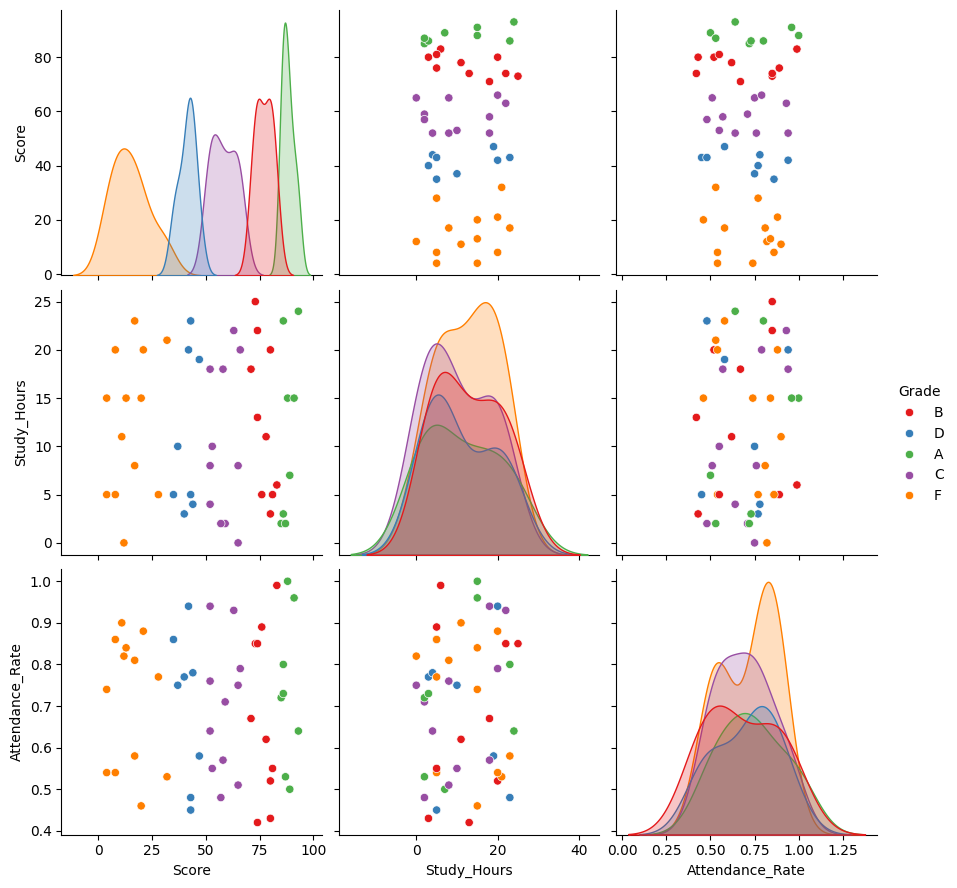

In [14]:
sb.pairplot(df,hue='Grade',palette='Set1',height=3);

The above images are called scatter plots which we can see how our dataset look like with our Grade as main classes. This way we can see the dataset distribution on different classes.

<h3>The below histogram also shows the distribution in discrete format

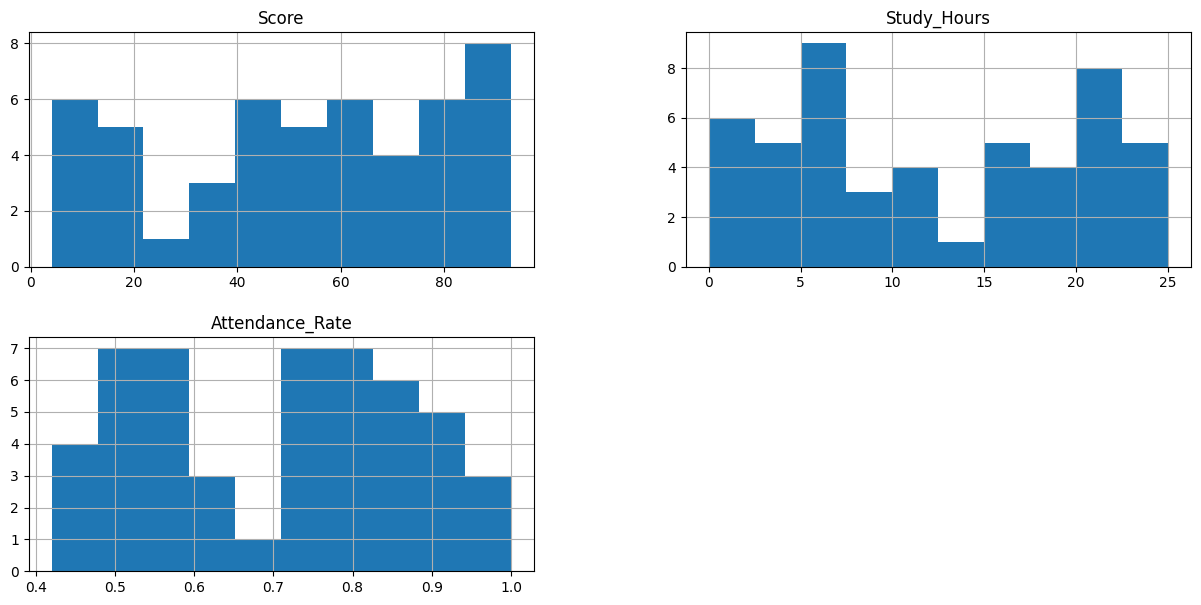

In [15]:
df.hist(figsize=(15, 7));

C:\PHH\Workspace\StudioForwardInternal\env\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


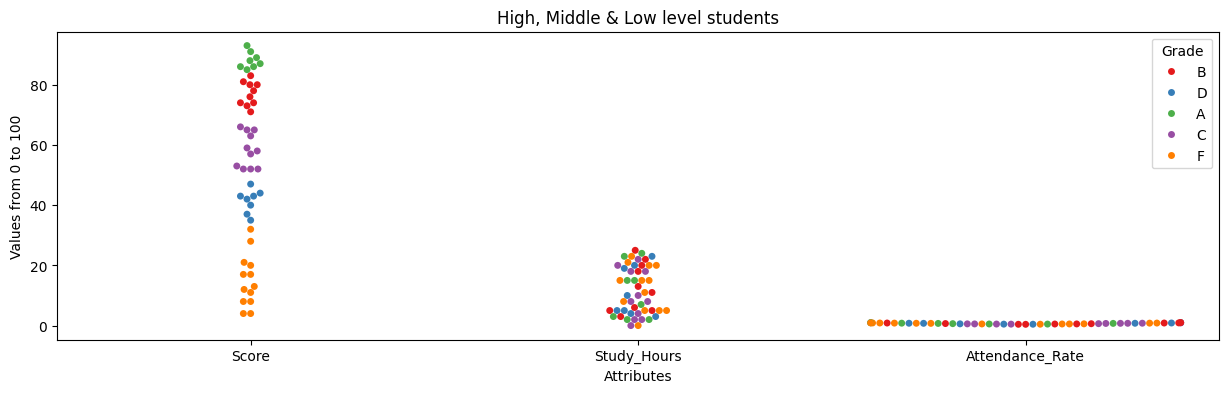

In [18]:
melt = pd.melt(df,id_vars='Grade',value_vars=['Score','Study_Hours','Attendance_Rate'])
plt.rcParams['figure.figsize']=(15,4)
sb.swarmplot(x='variable',y='value',hue='Grade' , data=melt,palette='Set1')
plt.ylabel('Values from 0 to 100')
plt.xlabel('Attributes')
plt.title('High, Middle & Low level students');